In [1]:
import pandas as pd
import numpy as np

In [22]:
data =  pd.read_csv("https://raw.githubusercontent.com/SURESHBEEKHANI/gemstone-price-prediction/refs/heads/main/notebook/data/gemstone.csv")
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [4]:
data.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
177076,177076,0.41,Ideal,I,VS2,61.7,56.0,4.78,4.75,2.94,1107
154426,154426,0.61,Very Good,I,SI2,62.8,57.6,5.43,5.45,3.41,1257
74570,74570,0.33,Premium,F,VS2,60.2,58.0,4.47,4.49,2.70,666
24810,24810,0.70,Premium,D,SI1,62.9,58.0,5.66,5.62,3.54,2587
153803,153803,2.11,Premium,J,SI2,61.7,59.0,8.21,8.26,5.08,12311
25321,25321,0.86,Very Good,G,SI2,59.6,57.0,6.20,6.24,3.73,2725
5740,5740,0.37,Ideal,E,VS1,61.6,55.0,4.65,4.61,2.86,1124
79261,79261,0.42,Ideal,F,VS1,62.1,55.0,4.79,4.82,2.98,984
15510,15510,0.30,Ideal,G,IF,61.4,57.0,4.28,4.25,2.63,956
44992,44992,1.00,Very Good,F,SI1,58.8,63.0,6.35,6.31,3.72,5006


In [5]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
data.shape

(193573, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
data.drop(labels=['id'],axis=1,inplace=True)
data


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [9]:
data.duplicated().sum()

0

In [10]:
cat_columns = data.columns[data.dtypes == 'object']

In [11]:
num_columns = data.columns[data.dtypes !='object']

In [12]:
data[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


# Univariate Analysis of Numerical Variables


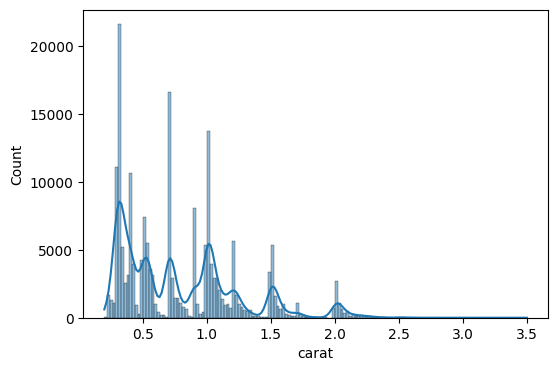

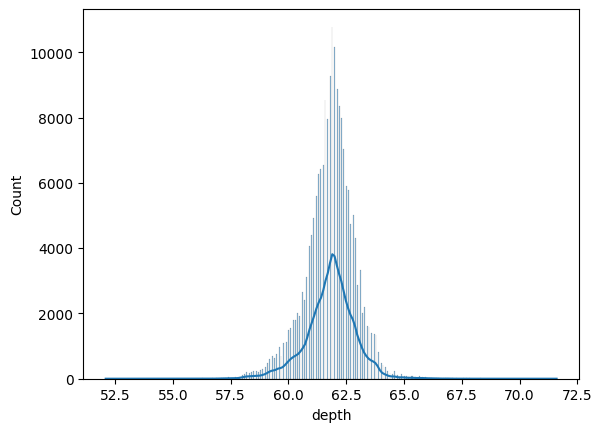

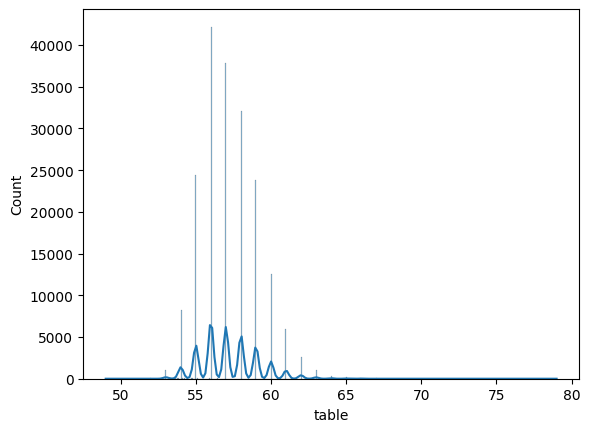

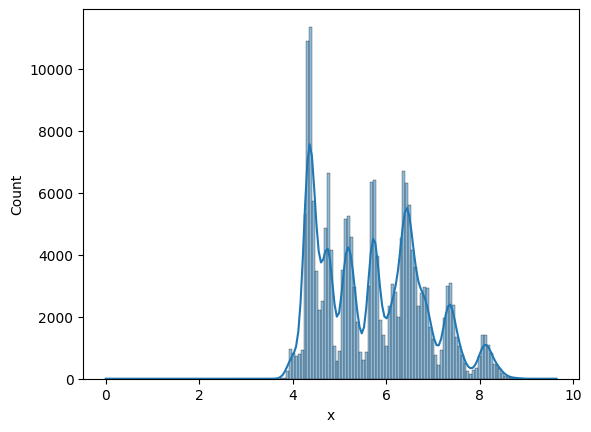

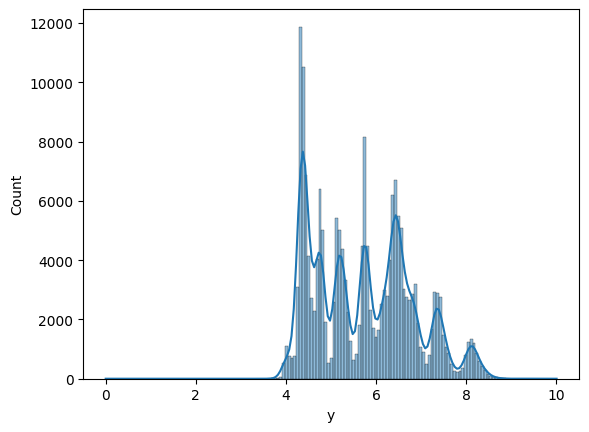

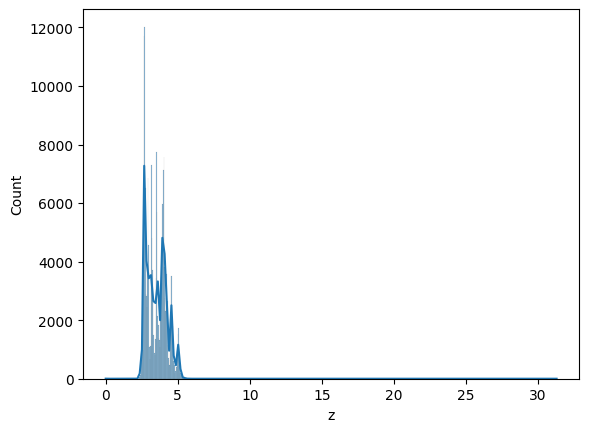

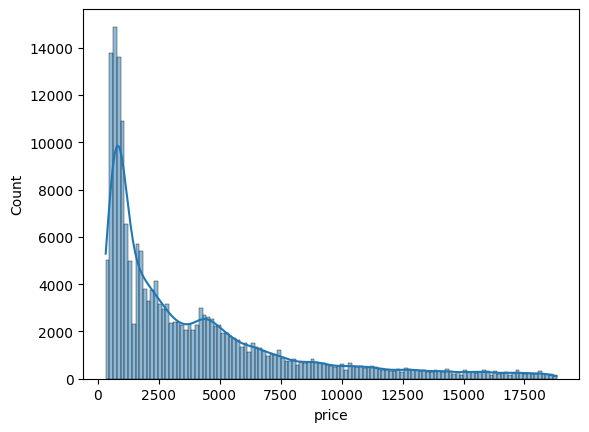

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))

for col in num_columns:
    sns.histplot(data= data, x=col, kde= True)
    print("\n")
    plt.show()

# Univariate analysis for categorical variables

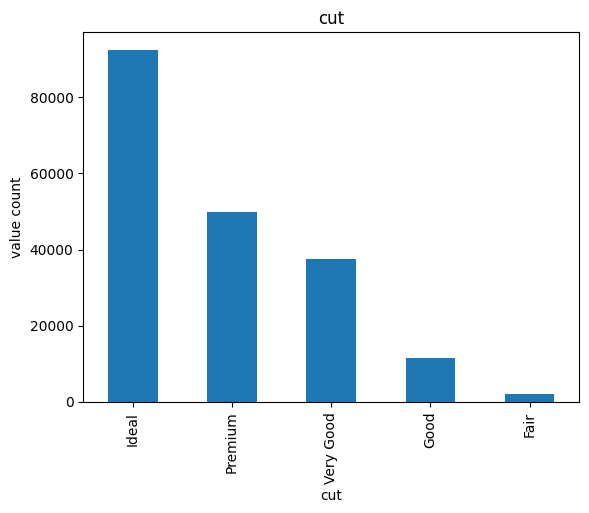

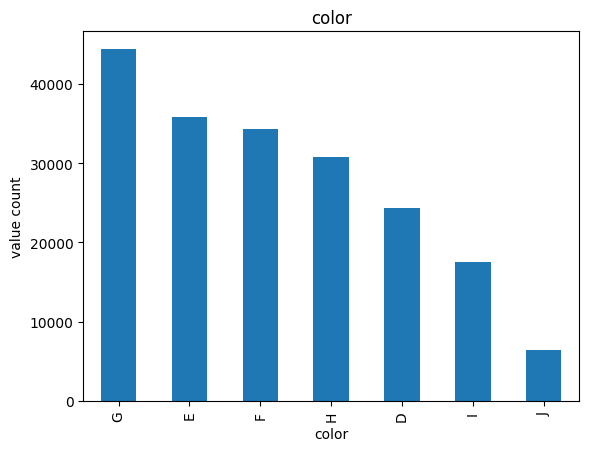

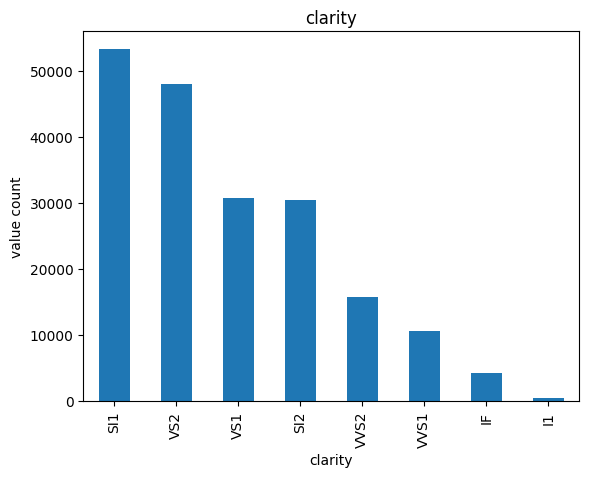

In [14]:
for col in cat_columns:
    data[col].value_counts().plot(kind='bar' ,xlabel = col, ylabel = 'value count',title = col)
    print('\n')
    plt.show()

# Correlation heatmap

<Axes: >

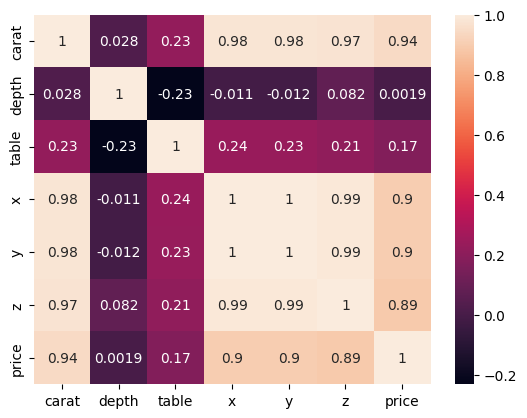

In [15]:
sns.heatmap(data[num_columns].corr(),annot=True)

# Categorical Features vs Target Feature Price Boxplot


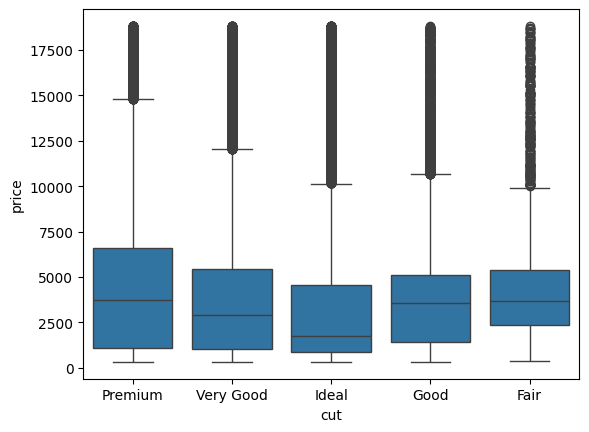

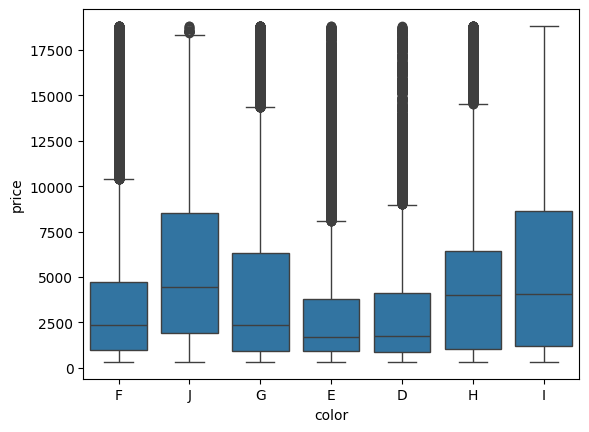

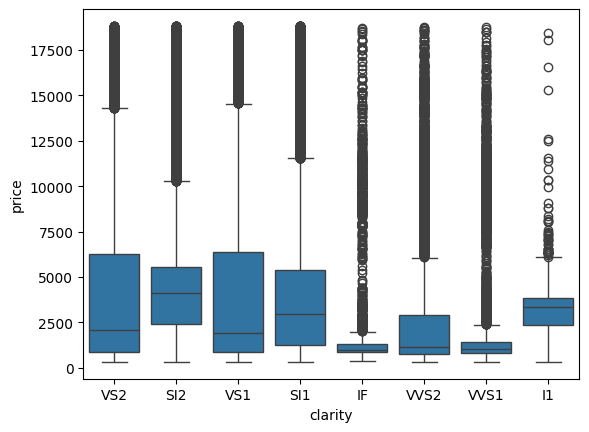

In [16]:
for col in cat_columns:
    sns.boxplot(data = data, x=col, y='price')
    plt.show()
    

#  Creating Mapping for each categorical variable

In [17]:
cut_map = {"Fair":1, "Good":2, "Very Good":3 , "Premium":4 ,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [18]:
data['cut'] = data['cut'].replace(cut_map)
data['clarity'] = data['clarity'].replace(clarity_map)
data['color'] = data['color'].replace(color_map)

In [19]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


# Data Pre-processing 

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
X = data.drop(columns=['id','price'],axis=1)
y = data['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.3+ MB


In [24]:
cat_cols = X.select_dtypes(include=object).columns
num_cols = X.select_dtypes(exclude=object).columns
num_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [25]:
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories = ["D" ,"E","F", "G","H", "I", "J"]
clarity_categories = ["I1","SI2" ,"SI1" ,"VS2" , "VS1",  "VVS2" , "VVS1" ,"IF"]

In [26]:
num_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer()),
        ('scaler',StandardScaler())
    ]
)

In [27]:
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [28]:
preprocessor = ColumnTransformer(
    [
        ('num_pipeline',num_pipeline,num_cols),
        ('cat_pipeline',cat_pipeline,cat_cols)
    ]
)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [30]:
preprocessor.fit_transform(X_train)

array([[-1.01639515, -0.20431653,  0.4026079 , ...,  3.        ,
         1.        ,  2.        ],
       [ 0.88239567,  0.72075808, -0.1185356 , ...,  3.        ,
         2.        ,  3.        ],
       [ 1.52971072,  0.35072823, -1.16082259, ...,  4.        ,
         5.        ,  3.        ],
       ...,
       [ 0.92555001,  0.905773  ,  0.4026079 , ...,  3.        ,
         3.        ,  3.        ],
       [-1.03797232, -0.66685384, -0.63967909, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03797232, -0.01930161,  0.9237514 , ...,  2.        ,
         3.        ,  1.        ]])

In [31]:
preprocessor.transform(X_test)

array([[-0.62800612,  0.25822077, -0.1185356 , ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60856914, -2.14697321, -0.1185356 , ...,  2.        ,
         3.        ,  1.        ],
       [-1.124281  , -1.2218986 ,  0.9237514 , ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [ 0.23508062,  0.53574316,  3.00832538, ...,  2.        ,
         2.        ,  2.        ],
       [-0.62800612,  0.16571331,  1.44489489, ...,  2.        ,
         2.        ,  2.        ],
       [-0.52012028, -1.49942098, -0.1185356 , ...,  2.        ,
         4.        ,  2.        ]])

In [32]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [33]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [34]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,3.0,5.0,1.0
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
154853,-0.628006,-1.499421,1.966038,-0.545277,-0.516918,-0.643825,2.0,1.0,2.0
154854,2.414375,0.443236,2.487182,1.921455,1.875054,1.934005,2.0,2.0,2.0
154855,0.925550,0.905773,0.402608,0.994180,0.923702,1.050591,3.0,3.0,3.0
154856,-1.037972,-0.666854,-0.639679,-1.211475,-1.196455,-1.252077,2.0,3.0,6.0


# Model Trainnig

In [36]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()

}
    

In [41]:
trained_model_list = []
model_list = []
r2_list =[]

In [45]:
def evaluate_model(test, pred):
    r2 = r2_score(test, pred)
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)

    return mae, mse, r2

In [48]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Train the model
    model.fit(X_train, y_train)

    # Make Prediction
    y_pred = model.predict(X_test)

    # For validation
    MAE, MSE, R2 = evaluate_model(y_test, y_pred)

    print("Model Trainnig Performance :", model)
    print('MSE',MSE)
    print('MAE',MAE)
    print('R2_score',R2)

    r2_list.append(R2)

    print('='*30)
    print('\n')

     







Model Trainnig Performance : LinearRegression()
MSE 1013245.5452810806
MAE 671.5856392794411
R2_score 0.9372975155452961


Model Trainnig Performance : Lasso()
MSE 1013790.3860145371
MAE 672.9964160404006
R2_score 0.9372637992681518


Model Trainnig Performance : Ridge()
MSE 1013256.1246827863
MAE 671.6145636350993
R2_score 0.9372968608621601


Model Trainnig Performance : ElasticNet()
MSE 2298790.237391505
MAE 1053.4176488002738
R2_score 0.8577443939467991


Model Trainnig Performance : RandomForestRegressor()
MSE 368893.3282967367
MAE 309.54121597271023
R2_score 0.9771718432015869


Model Trainnig Performance : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=Non